## Singular Value Decomposition (SVD)
Notes and experiments from http://machinelearningcoban.com/2017/06/07/svd/

In [1]:
import numpy as np
from scipy import misc
from numpy.linalg import linalg as LA
import matplotlib.pyplot as plt

m, n = 2, 3
A = np.random.rand(m, n)

U, S, V = LA.svd(A)

# Checking if U and V are orthogonal matrices
print('Frobenius norm of (UU^T - I) = ', LA.norm(U.dot(U.T) - np.eye(m)))
print('Frobenius norm of (VV^T - I) = ', LA.norm(V.dot(V.T) - np.eye(n)))

Frobenius norm of (UU^T - I) =  8.04433006107e-16
Frobenius norm of (VV^T - I) =  4.47545209131e-16


In [2]:
A = misc.imread('data/building.png')

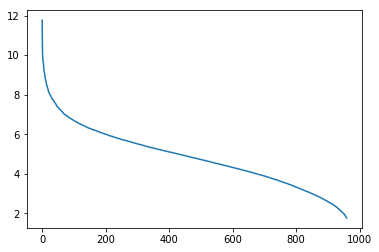

In [3]:
U, S, VT = LA.svd(A)

plt.plot(range(S.shape[0]), np.log(S))
plt.show()

___Observation___:
- The values of $\sigma_i$ (singular values) drop radically from $i = 100$ 
--> The loss info if $i >= 100$ is overall insignificant. We will inspect the maintained info ratio later.
This means that if we use $k = 100$ for compression, the target image would seem quite similar.

In [4]:
def make_diag(v, m=-1, n=-1):
    d = v.shape[0]
    if m == -1: m = d
    if n == -1: n = d
    
    diag = np.zeros((m, n))
    diag[:d, :d] = np.diagflat(v)    
    return diag

# Check if U, S, V are correct, ie. A = U*S*V^T 
S_diag = make_diag(S, 960, 1440)
np.allclose(A, U.dot(S_diag).dot(VT))

True

In [6]:
def _approximate(A, U, S, V, k):
    Uk = U[:, :k]
    Vk = V[:, :k]
    Sk = S[:k]
    
    Sk_diag = make_diag(Sk)
    Ak = Uk.dot(Sk_diag).dot(Vk.T)
    
    return Ak


def approximate(A, k):
    U, S, VT = LA.svd(A)
    return _approximate(A, U, S, VT.T, k)

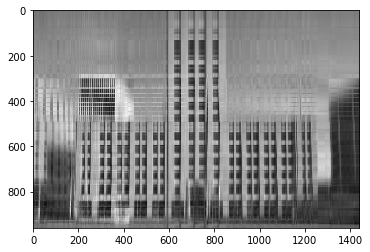

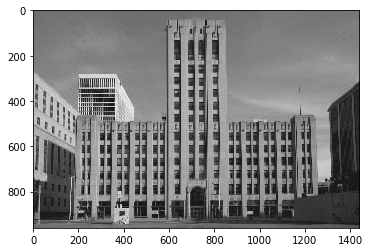

In [7]:
U, S, VT = LA.svd(A)
for k in [10, 100]:
    Ak = _approximate(A, U, S, VT.T, k)
    
    plt.imshow(Ak, interpolation='nearest', cmap='gray')
    plt.show()

Above is the compressed image corresponding with $k = 10$ and $k = 100$. We notice that the one with $k = 100$ gives the very similar quality as the original image. 

The compression ratio as $k = 100$, according to the blog post, is: $4k(m+n+1)/mn = 0.69$

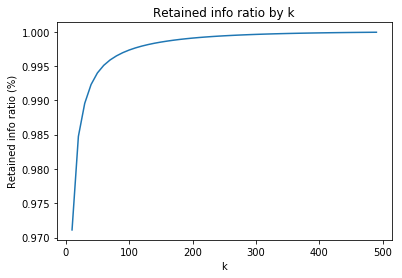

In [8]:
ratio_history = []
ks = range(10, 500, 10)

U, S, VT = LA.svd(A)
for k in ks:
    Ak = _approximate(A, U, S, VT.T, k)
    ratio = 1 - np.power(LA.norm(A - Ak), 2)/np.power(LA.norm(A), 2)
    ratio_history.append(ratio)

plt.plot(ks, ratio_history)
plt.title('Retained info ratio by k')
plt.xlabel('k')
plt.ylabel('Retained info ratio (%)')
plt.show()

The plot above illustrates how much the info retained by $k$. From the chart, the ratio for $k = 100$ is above 99%